In [1]:
import os
import numpy as np
import cv2

In [2]:
path1 = './face/'
path2 = './non-face/'

face_list = os.listdir(path1)
nonface_list = os.listdir(path2)

In [3]:
def readimg(file_path):
    img = cv2.imread(file_path, 0)
    height, width = img.shape
    vector_size = height*width
    img_vector = img.reshape(1, vector_size)
    return img_vector

In [4]:
readimg(path1+face_list[1])

array([[ 63,   3,  16, ...,  53,  53, 100]], dtype=uint8)

In [5]:
face_cube = readimg(path1+face_list[0])

In [6]:
face_cube

array([[  8,  16,  24, ..., 107, 108, 138]], dtype=uint8)

In [7]:
for line in face_list:
    tmp_vector = readimg(path1+line)
    face_cube = np.append(face_cube, tmp_vector, axis = 0)

In [8]:
face_cube.shape

(5993, 1024)

In [9]:
import matplotlib.pyplot as plt
def face_show(index):
    img = face_cube[index,:].reshape(32,32)
    plt.imshow(img,cmap = 'gray')

def nonface_show(index):
    img = nonface_cube[index,:].reshape(32,32)
    plt.imshow(img,cmap = 'gray')

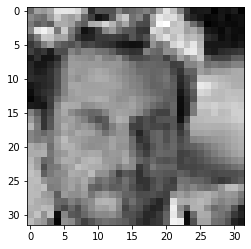

In [12]:
face_show(300)

In [13]:
nonface_cube = readimg(path2+nonface_list[0])
for line in nonface_list:
    tmp_vector = readimg(path2+line)
    nonface_cube = np.append(nonface_cube, tmp_vector, axis = 0)

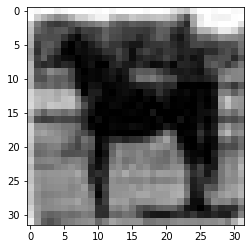

In [14]:
nonface_show(200)

In [15]:
img_set = np.append(face_cube, nonface_cube, axis = 0)

In [16]:
img_set.shape
len(img_set[1,:])

1024

In [17]:
img_set.shape

(11994, 1024)

In [18]:
img_set = img_set - img_set.mean(axis = 0)

In [19]:
img_set[:5]

array([[-120.1915958 , -111.20968818, -102.38477572, ...,   -5.90195098,
          -5.83024846,   22.55586126],
       [-120.1915958 , -111.20968818, -102.38477572, ...,   -5.90195098,
          -5.83024846,   22.55586126],
       [ -65.1915958 , -124.20968818, -110.38477572, ...,  -59.90195098,
         -60.83024846,  -15.44413874],
       [ -62.1915958 ,  -58.20968818,  -62.38477572, ...,    8.09804902,
         -56.83024846,  -41.44413874],
       [  85.8084042 ,  -79.20968818, -107.38477572, ...,  -70.90195098,
         -53.83024846,  -61.44413874]])

In [20]:
cov_mat = np.cov(img_set.T, bias=True)

In [21]:
eig_val, eig_vecs = np.linalg.eig(cov_mat)

In [22]:
eig_pairs = [(np.abs(eig_val[i]), eig_vecs[:,i]) for i in range(len(eig_val))]


In [23]:
eig_pairs

[(1231720.7854155598,
  array([-0.04446231, -0.04460737, -0.04502075, ..., -0.03701743,
         -0.03724363, -0.03725949])),
 (427985.5813379646,
  array([ 0.01578879,  0.01710919,  0.0190424 , ..., -0.02228271,
         -0.02135275, -0.02108941])),
 (307511.97299974103,
  array([ 0.00045822, -0.00265639, -0.00619681, ...,  0.05199263,
          0.05333297,  0.05474674])),
 (255774.692430127,
  array([0.0043201 , 0.0054991 , 0.00736314, ..., 0.02336166, 0.02160987,
         0.01874466])),
 (208595.97580463722,
  array([-0.07756225, -0.07627664, -0.0721849 , ...,  0.01220685,
          0.0039515 , -0.00358228])),
 (133030.79477686613,
  array([-0.04896696, -0.05200752, -0.05539975, ..., -0.00948514,
         -0.0079043 , -0.00747177])),
 (116678.68891700073,
  array([-0.04681247, -0.04965276, -0.05118664, ...,  0.01745741,
          0.01525803,  0.01333091])),
 (88760.21205416018,
  array([0.00978702, 0.00900782, 0.00613865, ..., 0.05857334, 0.05932666,
         0.05698453])),
 (67778.

In [24]:
eig_pairs.sort(key = lambda x: x[0], reverse=True)

In [25]:
eig_pairs

[(1231720.7854155598,
  array([-0.04446231, -0.04460737, -0.04502075, ..., -0.03701743,
         -0.03724363, -0.03725949])),
 (427985.5813379646,
  array([ 0.01578879,  0.01710919,  0.0190424 , ..., -0.02228271,
         -0.02135275, -0.02108941])),
 (307511.97299974103,
  array([ 0.00045822, -0.00265639, -0.00619681, ...,  0.05199263,
          0.05333297,  0.05474674])),
 (255774.692430127,
  array([0.0043201 , 0.0054991 , 0.00736314, ..., 0.02336166, 0.02160987,
         0.01874466])),
 (208595.97580463722,
  array([-0.07756225, -0.07627664, -0.0721849 , ...,  0.01220685,
          0.0039515 , -0.00358228])),
 (133030.79477686613,
  array([-0.04896696, -0.05200752, -0.05539975, ..., -0.00948514,
         -0.0079043 , -0.00747177])),
 (116678.68891700073,
  array([-0.04681247, -0.04965276, -0.05118664, ...,  0.01745741,
          0.01525803,  0.01333091])),
 (88760.21205416018,
  array([0.00978702, 0.00900782, 0.00613865, ..., 0.05857334, 0.05932666,
         0.05698453])),
 (67778.

In [26]:
eig_vecs.shape

(1024, 1024)

In [59]:
cond = (eig_val/eig_val.sum()).cumsum()

In [28]:
cond = cond >=0.90

In [61]:
cond[:100]

array([0.29826921, 0.40190871, 0.47637474, 0.53831225, 0.58882512,
       0.6210394 , 0.6492939 , 0.67078777, 0.68720066, 0.70186039,
       0.71379577, 0.72473342, 0.73459641, 0.74399218, 0.75208562,
       0.75969042, 0.76698008, 0.77382196, 0.77965965, 0.78540512,
       0.79084195, 0.79578197, 0.80045267, 0.80470558, 0.80884292,
       0.81263952, 0.81636292, 0.81992623, 0.82341233, 0.82671967,
       0.82996753, 0.83296561, 0.83591704, 0.83866334, 0.84132136,
       0.84388463, 0.84637886, 0.8487997 , 0.8510966 , 0.85331245,
       0.85542724, 0.85751347, 0.85951795, 0.86144468, 0.86332941,
       0.86514906, 0.86688009, 0.86857243, 0.87022621, 0.87185539,
       0.87345662, 0.87501807, 0.87652676, 0.87798417, 0.87943195,
       0.88081028, 0.88216126, 0.88349076, 0.88480788, 0.88607299,
       0.88731478, 0.88852315, 0.88969079, 0.89083843, 0.89194874,
       0.89304295, 0.89413592, 0.89520678, 0.89627097, 0.89730745,
       0.89833822, 0.89933302, 0.9002925 , 0.90123433, 0.90216

In [29]:
index = cond.argmax()

In [30]:
index

72

In [31]:
eig_val[:100]

array([1231720.78541556,  427985.58133796,  307511.97299974,
        255774.69243013,  208595.97580464,  133030.79477687,
        116678.688917  ,   88760.21205416,   67778.05188435,
         60538.23227487,   49287.86931037,   45167.68805378,
         40729.79608746,   38800.41262322,   33422.34455014,
         31404.49505366,   30103.08104246,   28253.97371432,
         24107.08460006,   23726.28545709,   22451.69005012,
         20400.11786619,   19287.95760849,   17562.62580538,
         17085.4219058 ,   15678.2658006 ,   15376.02732649,
         14714.90161736,   14396.06116686,   13657.83657243,
         13412.23709985,   12380.75867271,   12188.10811261,
         11341.0423992 ,   10976.41588189,   10585.20461451,
         10300.08334023,    9996.99765979,    9485.17113224,
          9150.47808802,    8733.15190881,    8615.2192891 ,
          8277.62392857,    7956.57464061,    7783.1050653 ,
          7514.35239247,    7148.35984311,    6988.6301967 ,
          6829.39971899,

In [32]:
cond[:1000]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [33]:
vector = eig_vecs[:,:index+1]

In [34]:
vector.shape

(1024, 73)

In [35]:
PCA_result = np.dot(img_set, vector)

In [36]:
PCA_result[1,:].shape

(73,)

In [37]:
PCA_result.shape

(11994, 73)

In [38]:
def compute_dis(vecA, vecB):

    distance = np.sqrt(sum(np.power(vecA-vecB, 2)))
    return distance

In [39]:
dist_list = np.zeros((len(PCA_result[:,0]), len(PCA_result[:,0])))

In [40]:
#for i in range(len(PCA_result[:,0])):
#    for j in range(len(PCA_result[:,0])):
#        dist_list[i,j] = compute_dis(PCA_result[i,:], PCA_result[j,:])

In [41]:
label = np.zeros(len(PCA_result[:,0]))

In [42]:
# 1 for face , 0 for nonface
for i in range(len(face_cube)):
    label[i] = 1

In [55]:
PCA_pairs = [(PCA_result[i], label[i]) for i in range(len(PCA_result))]
Normal_pairs = [(img_set[i], label[i]) for i in range(len(img_set))]

In [56]:
import random
random.shuffle(PCA_pairs)
random.shuffle(Normal_pairs)

In [57]:
PCATest_set = PCA_pairs[:1000]
NormalTest_set = Normal_pairs[:1000]

In [46]:
PCATest_set[1][0]

array([ 1.30660695e+02, -8.24135863e+02, -1.34192992e+02,  4.98263024e+02,
        2.81698788e+02, -5.68418369e+01,  7.41410824e+02,  2.07222901e+02,
       -5.20719525e+00, -6.70255032e+02, -2.40121636e+02, -6.28469686e+01,
        6.33197046e+01, -7.29320397e+01,  2.46136342e+02, -2.07535468e+01,
       -1.58876279e+02,  2.24857795e+02, -1.62996698e+02,  2.00932388e+02,
       -2.92507567e+02, -2.31850757e+02, -2.00284330e+02, -4.46346511e+01,
        2.24896767e+01, -4.68458102e+01,  1.17429353e+01,  9.15888150e+01,
       -9.66234813e+01, -5.80551407e+01, -2.86080173e+01,  9.33785692e+01,
       -1.86689309e+02,  9.74447086e+01, -7.27225693e-01,  1.79992077e+02,
        5.42557420e+01,  1.29603005e+02,  9.33014559e+01, -4.97119288e+01,
       -6.24118343e+01, -1.20719137e+02,  6.38174813e+01, -3.97471869e+01,
        2.50113849e+01, -1.19028054e+02, -2.59203377e+01,  2.29076978e+01,
       -7.97115513e+01, -5.80540776e+01,  8.46568436e+01, -1.03276787e+02,
       -2.00941676e+01,  

In [47]:
def KNN(Data_set,Test_set,K = 20):
    precise_count = 0
    for i in range(len(Test_set)):
        distance_list = np.zeros((len(Data_set),2))
        for j in range(len(Data_set)):
            distance_list[j,0] = compute_dis(Test_set[i][0], Data_set[j][0]) #distance
            distance_list[j,1] = Data_set[j][1] # label 
        distance_list = distance_list.tolist()
        distance_list.sort(key = lambda x: x[0])
        entity = 0
        for num in range(K):
            if distance_list[num][1] == 1:
                entity += 1
            else:
                entity -= 1
        print(entity)
        if (entity > 0):
            predict_lable = 1
        else:
            predict_lable = 0

        if(predict_lable == Test_set[i][1]):
            precise_count += 1
            print('label successfully predicted! {num}, {now}'.format(num = precise_count, now = i))
    
    accurancy = float(precise_count/len(Test_set))
    print('the accurancy of test data is {ac}'.format(ac = accurancy))
    

In [48]:
KNN(PCA_pairs, PCATest_set)

16
label successfully predicted! 1, 0
-16
label successfully predicted! 2, 1
-20
label successfully predicted! 3, 2
20
label successfully predicted! 4, 3
2
label successfully predicted! 5, 4
6
label successfully predicted! 6, 5
-18
label successfully predicted! 7, 6
20
label successfully predicted! 8, 7
20
label successfully predicted! 9, 8
-20
label successfully predicted! 10, 9
-20
label successfully predicted! 11, 10
14
label successfully predicted! 12, 11
-14
label successfully predicted! 13, 12
-12
label successfully predicted! 14, 13
-16
label successfully predicted! 15, 14
-20
label successfully predicted! 16, 15
-14
-20
label successfully predicted! 17, 17
-20
label successfully predicted! 18, 18
20
label successfully predicted! 19, 19
-4
20
label successfully predicted! 20, 21
-20
label successfully predicted! 21, 22
-2
label successfully predicted! 22, 23
20
label successfully predicted! 23, 24
20
label successfully predicted! 24, 25
16
label successfully predicted! 25, 26
20

2
label successfully predicted! 199, 213
18
label successfully predicted! 200, 214
-18
label successfully predicted! 201, 215
-20
label successfully predicted! 202, 216
-20
label successfully predicted! 203, 217
-20
label successfully predicted! 204, 218
18
label successfully predicted! 205, 219
0
label successfully predicted! 206, 220
-18
label successfully predicted! 207, 221
-18
label successfully predicted! 208, 222
-20
label successfully predicted! 209, 223
-20
label successfully predicted! 210, 224
20
label successfully predicted! 211, 225
20
label successfully predicted! 212, 226
20
label successfully predicted! 213, 227
-16
label successfully predicted! 214, 228
20
label successfully predicted! 215, 229
-20
label successfully predicted! 216, 230
0
label successfully predicted! 217, 231
12
label successfully predicted! 218, 232
-20
label successfully predicted! 219, 233
-16
label successfully predicted! 220, 234
2
label successfully predicted! 221, 235
16
label successfully pred

-4
label successfully predicted! 391, 419
20
label successfully predicted! 392, 420
-20
label successfully predicted! 393, 421
-20
label successfully predicted! 394, 422
-20
label successfully predicted! 395, 423
20
label successfully predicted! 396, 424
20
label successfully predicted! 397, 425
-20
label successfully predicted! 398, 426
-16
label successfully predicted! 399, 427
-20
label successfully predicted! 400, 428
20
label successfully predicted! 401, 429
-4
20
label successfully predicted! 402, 431
-20
label successfully predicted! 403, 432
20
label successfully predicted! 404, 433
-16
label successfully predicted! 405, 434
-16
label successfully predicted! 406, 435
-18
label successfully predicted! 407, 436
12
label successfully predicted! 408, 437
20
label successfully predicted! 409, 438
-20
label successfully predicted! 410, 439
-20
label successfully predicted! 411, 440
-20
label successfully predicted! 412, 441
-20
label successfully predicted! 413, 442
-20
label success

20
label successfully predicted! 584, 622
-20
label successfully predicted! 585, 623
-18
label successfully predicted! 586, 624
18
0
label successfully predicted! 587, 626
-14
label successfully predicted! 588, 627
-16
label successfully predicted! 589, 628
-18
label successfully predicted! 590, 629
20
label successfully predicted! 591, 630
-20
label successfully predicted! 592, 631
20
label successfully predicted! 593, 632
-20
label successfully predicted! 594, 633
-20
label successfully predicted! 595, 634
-20
label successfully predicted! 596, 635
-20
label successfully predicted! 597, 636
-20
label successfully predicted! 598, 637
-16
label successfully predicted! 599, 638
20
label successfully predicted! 600, 639
20
label successfully predicted! 601, 640
-20
label successfully predicted! 602, 641
4
label successfully predicted! 603, 642
-16
label successfully predicted! 604, 643
20
label successfully predicted! 605, 644
18
label successfully predicted! 606, 645
-18
label successfu

16
label successfully predicted! 777, 826
20
label successfully predicted! 778, 827
4
20
label successfully predicted! 779, 829
20
label successfully predicted! 780, 830
18
label successfully predicted! 781, 831
20
label successfully predicted! 782, 832
20
label successfully predicted! 783, 833
-14
label successfully predicted! 784, 834
-18
label successfully predicted! 785, 835
20
label successfully predicted! 786, 836
-14
label successfully predicted! 787, 837
20
label successfully predicted! 788, 838
16
label successfully predicted! 789, 839
20
label successfully predicted! 790, 840
20
label successfully predicted! 791, 841
20
label successfully predicted! 792, 842
-16
label successfully predicted! 793, 843
12
label successfully predicted! 794, 844
18
label successfully predicted! 795, 845
-8
label successfully predicted! 796, 846
-12
label successfully predicted! 797, 847
16
label successfully predicted! 798, 848
-18
label successfully predicted! 799, 849
-20
label successfully pre

In [58]:
KNN(Normal_pairs, NormalTest_set)

18
label successfully predicted! 1, 0
-20
label successfully predicted! 2, 1
4
-20
label successfully predicted! 3, 3
-16
label successfully predicted! 4, 4
-20
label successfully predicted! 5, 5
18
label successfully predicted! 6, 6
-20
label successfully predicted! 7, 7
-20
label successfully predicted! 8, 8
4
20
label successfully predicted! 9, 10
20
label successfully predicted! 10, 11
20
label successfully predicted! 11, 12
18
label successfully predicted! 12, 13
-2
20
label successfully predicted! 13, 15
-20
label successfully predicted! 14, 16
20
label successfully predicted! 15, 17
20
label successfully predicted! 16, 18
20
label successfully predicted! 17, 19
18
label successfully predicted! 18, 20
-14
label successfully predicted! 19, 21
20
label successfully predicted! 20, 22
20
label successfully predicted! 21, 23
-20
label successfully predicted! 22, 24
20
label successfully predicted! 23, 25
20
label successfully predicted! 24, 26
10
label successfully predicted! 25, 27
-

20
label successfully predicted! 197, 218
20
label successfully predicted! 198, 219
-2
-20
label successfully predicted! 199, 221
-18
label successfully predicted! 200, 222
20
label successfully predicted! 201, 223
-20
label successfully predicted! 202, 224
18
label successfully predicted! 203, 225
-18
label successfully predicted! 204, 226
16
label successfully predicted! 205, 227
-20
label successfully predicted! 206, 228
8
label successfully predicted! 207, 229
-20
label successfully predicted! 208, 230
-20
label successfully predicted! 209, 231
-20
label successfully predicted! 210, 232
-20
label successfully predicted! 211, 233
-16
label successfully predicted! 212, 234
-20
label successfully predicted! 213, 235
20
label successfully predicted! 214, 236
20
label successfully predicted! 215, 237
16
label successfully predicted! 216, 238
-14
label successfully predicted! 217, 239
16
label successfully predicted! 218, 240
-20
label successfully predicted! 219, 241
-20
label successfu

-20
label successfully predicted! 389, 428
20
label successfully predicted! 390, 429
-18
label successfully predicted! 391, 430
-20
label successfully predicted! 392, 431
20
label successfully predicted! 393, 432
-2
20
label successfully predicted! 394, 434
18
label successfully predicted! 395, 435
-18
label successfully predicted! 396, 436
-20
label successfully predicted! 397, 437
20
label successfully predicted! 398, 438
14
label successfully predicted! 399, 439
-20
label successfully predicted! 400, 440
20
label successfully predicted! 401, 441
-18
label successfully predicted! 402, 442
16
label successfully predicted! 403, 443
18
label successfully predicted! 404, 444
-18
label successfully predicted! 405, 445
-18
label successfully predicted! 406, 446
-20
label successfully predicted! 407, 447
20
label successfully predicted! 408, 448
-14
label successfully predicted! 409, 449
-20
label successfully predicted! 410, 450
-20
label successfully predicted! 411, 451
-20
label successf

-20
label successfully predicted! 582, 633
-20
label successfully predicted! 583, 634
-20
label successfully predicted! 584, 635
-20
label successfully predicted! 585, 636
-18
label successfully predicted! 586, 637
20
label successfully predicted! 587, 638
-20
label successfully predicted! 588, 639
20
label successfully predicted! 589, 640
-20
label successfully predicted! 590, 641
20
label successfully predicted! 591, 642
-20
label successfully predicted! 592, 643
-18
label successfully predicted! 593, 644
-20
label successfully predicted! 594, 645
-18
label successfully predicted! 595, 646
-20
label successfully predicted! 596, 647
-18
label successfully predicted! 597, 648
-18
label successfully predicted! 598, 649
12
label successfully predicted! 599, 650
20
label successfully predicted! 600, 651
0
-20
label successfully predicted! 601, 653
20
label successfully predicted! 602, 654
-8
label successfully predicted! 603, 655
18
label successfully predicted! 604, 656
18
label successf

10
label successfully predicted! 775, 840
-20
label successfully predicted! 776, 841
-20
label successfully predicted! 777, 842
20
label successfully predicted! 778, 843
20
label successfully predicted! 779, 844
20
label successfully predicted! 780, 845
20
label successfully predicted! 781, 846
-20
label successfully predicted! 782, 847
-20
label successfully predicted! 783, 848
20
label successfully predicted! 784, 849
-14
label successfully predicted! 785, 850
-20
label successfully predicted! 786, 851
-20
label successfully predicted! 787, 852
-20
label successfully predicted! 788, 853
-20
label successfully predicted! 789, 854
-20
label successfully predicted! 790, 855
-20
label successfully predicted! 791, 856
20
label successfully predicted! 792, 857
-20
label successfully predicted! 793, 858
-4
label successfully predicted! 794, 859
20
label successfully predicted! 795, 860
-20
label successfully predicted! 796, 861
-16
label successfully predicted! 797, 862
-18
label successful